# ALFALFA Grid Tools

Some useful functions, and examples of use of searching ALFALFA grids. 
Includes: 
* Plotting exisiting grids
* Finding edge grids
* Finding if a sky position is in a specific grid
* Finding which grid(s) a sky position is in

From Grid Finding Subgroup at the ALFLAFA Legacy Workshop, July 2025
* Greg Hallenbeck
* Karen Masters
* Mike Jones
* Catie Bell

In [124]:
#Import statements

import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle

from astropy import wcs

from regions import RectangleSkyRegion
import numpy as np

import matplotlib.pyplot as plt

In [136]:
#Defining some functions

def makegridwcs(sky_center):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [float(sky_center.ra/u.deg), float(sky_center.dec/u.deg)]
    w.wcs.cdelt = [1.0,1.0]
    w.wcs.crval = [float(sky_center.ra/u.deg), float(sky_center.dec/u.deg)]
    w.wcs.ctype = ["RA---CAR", "DEC--CAR"]
    return w

def plotgrid(i):
    sky_region = grids["box"][i]
    sky_center = grids["coord"][i]
    w = makegridwcs(sky_center)            
    pixel_region = sky_region.to_pixel(w)
    pixel_region.plot(ax=ax, color='red', lw=1.0)

def grid_find(skycoord):
    return grids.loc[grids["box"].map(lambda x: x.contains(skycoord, makegridwcs(x.center))) ]

In [126]:
#Opening the list of grids, and putting it into a Pandas database

with open("gridlist_july2025.txt", "r") as f:
    grids = f.read().split()

grids = pd.DataFrame({"gridname": grids})
grids["coord"] = grids.gridname.map(lambda x: SkyCoord(x[0:2] + ":" + x[2:], unit=(u.hourangle, u.deg)))
grids["box"]   = grids.coord.map(lambda x:RectangleSkyRegion(x, width=2.4*u.deg, height = 2.4*u.deg))

grids["ra"] = grids["coord"].map(lambda x: round(float(x.ra/u.deg)))
grids["dec"] = grids["coord"].map(lambda x: round(float(x.dec/u.deg)))

# This adds a True/False column for if a given grid is an edge grid
grids["boundary"] = True
for i in range(len(grids)):
    above = False
    below = False
    left = False
    right = False
    if len(grids.loc[(grids.ra[i] - grids.ra == 2) & (grids.dec[i] == grids.dec)]):
        left = True
    if len(grids.loc[(grids.ra[i] - grids.ra == -2) & (grids.dec[i] == grids.dec)]):
        right = True
    if len(grids.loc[(grids.dec[i] - grids.dec == 2) & (grids.ra[i] == grids.ra)]):
        above = True
    if len(grids.loc[(grids.dec[i] - grids.dec == -2) & (grids.ra[i] == grids.ra)]):
        below = True
    if above and below and left and right:
        grids.loc[i, "boundary"] = False

In [139]:
grids.head()

,gridname,coord,box,ra,dec,boundary
0,0004+01,"<SkyCoord (ICRS): (ra, dec) in deg\n (1., 1.)>",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,1,1,True
1,0004+03,"<SkyCoord (ICRS): (ra, dec) in deg\n (1., 3.)>",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,1,3,True
2,0004+05,"<SkyCoord (ICRS): (ra, dec) in deg\n (1., 5.)>",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,1,5,True
3,0004+07,"<SkyCoord (ICRS): (ra, dec) in deg\n (1., 7.)>",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,1,7,True
4,0004+09,"<SkyCoord (ICRS): (ra, dec) in deg\n (1., 9.)>",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,1,9,True


## Plotting Grids

1. Plot a single grid

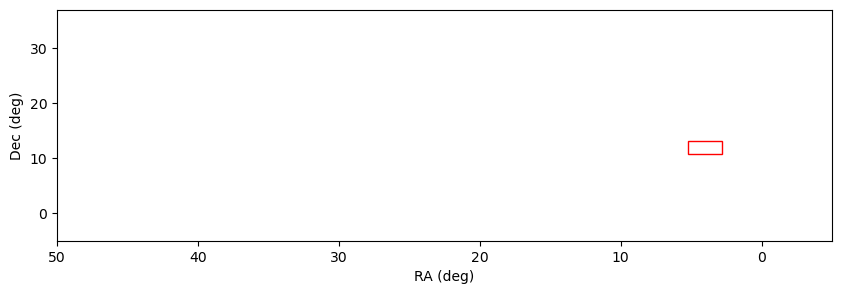

In [138]:
fig, ax = plt.subplots(figsize=(10,3))

#You have to manually enter the limits for your plot. 
plt.xlim(50, -5)
plt.ylim(-5,37)
plt.ylabel('Dec (deg)') 
plt.xlabel('RA (deg)')

i=42
plotgrid(i)

2. Plot all the grids on a rectangular all Arecibo sky projection

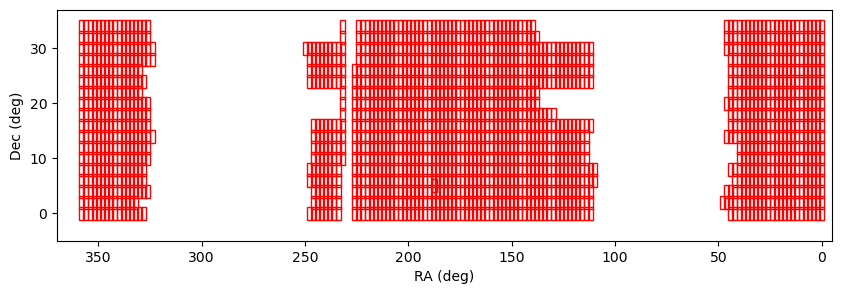

In [137]:
fig, ax = plt.subplots(figsize=(10,3))
plt.xlim(370, -5)
plt.ylim(-5,37)
plt.ylabel('Dec (deg)') 
plt.xlabel('RA (deg)')

for i in range(len(grids)): plotgrid(i)

## Grid Searching
1. Is a sky position in a specific grid

In [115]:
# Enter your RA and Dec in decimal degrees, 
# or do something more complicated to make a SkyCoord object
ra = 100
dec = 30
skycoord = SkyCoord(ra, dec, unit='deg')

#Enter your grid number if you know it
i=42 #Grid number
sky_region = grids["box"][i]

sky_region.contains(skycoord, makegridwcs(sky_region.center))

np.False_

2. Which grid is a sky position in? 

In [140]:
# Enter your RA and Dec in decimal degrees, 
# or do something more complicated to make a SkyCoord object
ra = 200
dec = 30
skycoord = SkyCoord(ra, dec, unit='deg')

grid_find(skycoord)

,gridname,coord,box,ra,dec,boundary
1143,1316+29,"<SkyCoord (ICRS): (ra, dec) in deg\n (199.,...",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,199,29,False
1144,1316+31,"<SkyCoord (ICRS): (ra, dec) in deg\n (199.,...",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,199,31,False
1161,1324+29,"<SkyCoord (ICRS): (ra, dec) in deg\n (201.,...",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,201,29,False
1162,1324+31,"<SkyCoord (ICRS): (ra, dec) in deg\n (201.,...",Region: RectangleSkyRegion\ncenter: <SkyCoord ...,201,31,False
